<a href="https://colab.research.google.com/github/lohith1266/oasis-infobyte-intership-Data-Anallytics/blob/main/Task_7_fraud_dtecton_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (39702, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

     

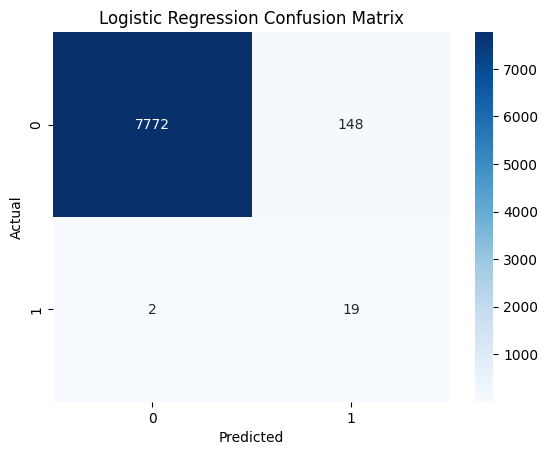


Decision Tree Performance:
Accuracy: 0.9989925702052638
ROC-AUC: 0.8807629870129869
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7920
         1.0       0.84      0.76      0.80        21

    accuracy                           1.00      7941
   macro avg       0.92      0.88      0.90      7941
weighted avg       1.00      1.00      1.00      7941



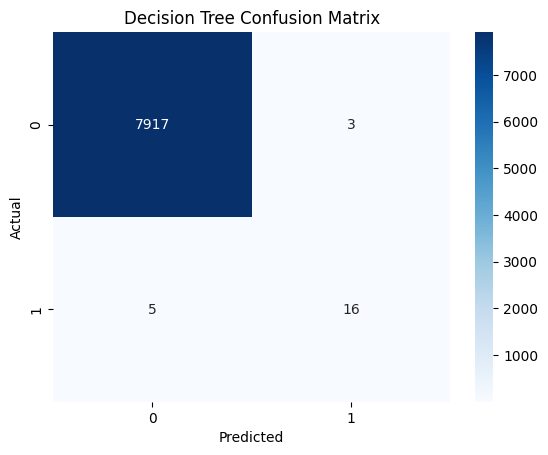


Neural Network (MLP) Performance:
Accuracy: 0.9994962851026319
ROC-AUC: 0.9522546897546896
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7920
         1.0       0.90      0.90      0.90        21

    accuracy                           1.00      7941
   macro avg       0.95      0.95      0.95      7941
weighted avg       1.00      1.00      1.00      7941



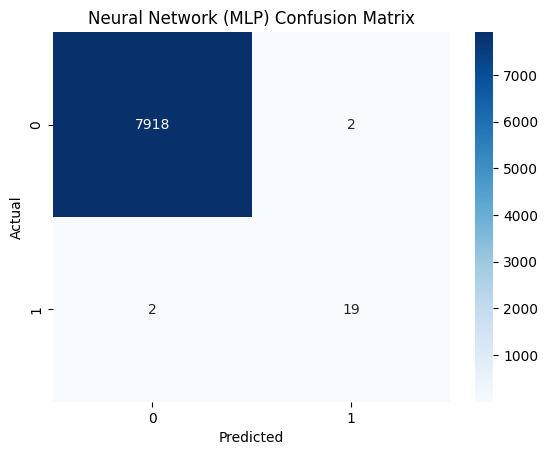

/tmp/ipython-input-2496488695.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


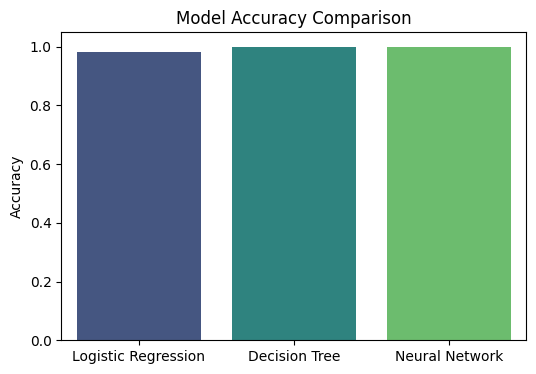

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Step 2: Load Dataset
df = pd.read_csv("/content/creditcard.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Explore Data
print("\nClass Distribution:")
print(df["Class"].value_counts(normalize=True))  # Check imbalance

# Remove rows with missing values in the 'Class' column
df.dropna(subset=['Class'], inplace=True)

# Step 4: Features (X) and Target (y)
X = df.drop("Class", axis=1)
y = df["Class"]

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train Models
# Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

# Neural Network (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=50, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_pred = mlp.predict(X_test_scaled)

# Step 8: Evaluation Function
def evaluate_model(name, y_true, y_pred, y_prob=None):
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Step 9: Evaluate All Models
evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Neural Network (MLP)", y_test, mlp_pred)

# Step 10: Compare Model Accuracies
models = ["Logistic Regression", "Decision Tree", "Neural Network"]
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, mlp_pred),
    accuracy_score(y_test, dt_pred),
]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()